In [1]:
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 20 
X = np.random.random(N) * 10 - 5
Y = 0.5 * X - 1 + np.random.randn(N)

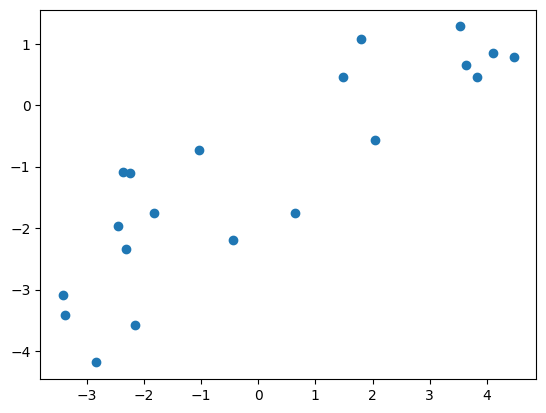

In [3]:
plt.scatter(X, Y)

In [4]:
model = nn.Linear(1, 1)

In [5]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [6]:
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

In [7]:
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [8]:
epochs = 30

losses = []

for i in range(epochs):
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    losses.append(loss.item())
    
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {i + 1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 1/30, Loss: 3.3038
Epoch 2/30, Loss: 2.3612
Epoch 3/30, Loss: 1.7580
Epoch 4/30, Loss: 1.3718
Epoch 5/30, Loss: 1.1247
Epoch 6/30, Loss: 0.9664
Epoch 7/30, Loss: 0.8652
Epoch 8/30, Loss: 0.8003
Epoch 9/30, Loss: 0.7588
Epoch 10/30, Loss: 0.7322
Epoch 11/30, Loss: 0.7152
Epoch 12/30, Loss: 0.7043
Epoch 13/30, Loss: 0.6974
Epoch 14/30, Loss: 0.6929
Epoch 15/30, Loss: 0.6901
Epoch 16/30, Loss: 0.6882
Epoch 17/30, Loss: 0.6871
Epoch 18/30, Loss: 0.6863
Epoch 19/30, Loss: 0.6858
Epoch 20/30, Loss: 0.6855
Epoch 21/30, Loss: 0.6853
Epoch 22/30, Loss: 0.6852
Epoch 23/30, Loss: 0.6851
Epoch 24/30, Loss: 0.6851
Epoch 25/30, Loss: 0.6850
Epoch 26/30, Loss: 0.6850
Epoch 27/30, Loss: 0.6850
Epoch 28/30, Loss: 0.6850
Epoch 29/30, Loss: 0.6850
Epoch 30/30, Loss: 0.6850


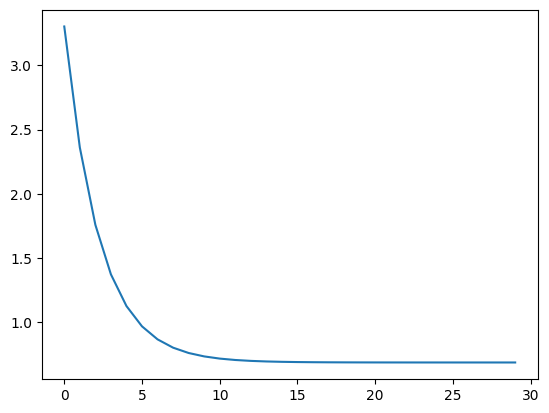

In [9]:
plt.plot(losses)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


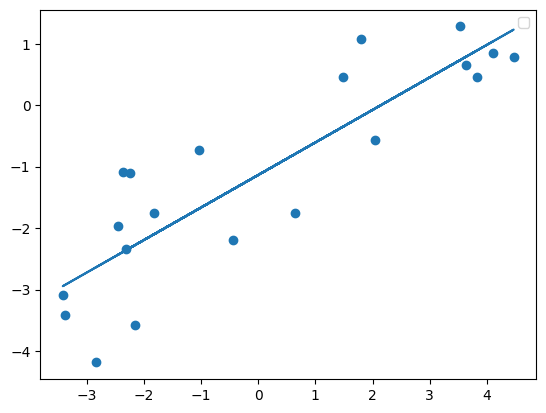

In [10]:
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y)
plt.plot(X, predicted)
plt.legend()
plt.show()

In [11]:
# Another way without detach
with torch.no_grad():
    out = model(inputs).numpy()
out

array([[ 0.73159873],
       [-2.4346948 ],
       [ 1.037639  ],
       [-2.3269029 ],
       [-2.3856153 ],
       [-2.275044  ],
       [ 0.79102135],
       [-1.3662728 ],
       [-2.92176   ],
       [-2.9456964 ],
       [-0.790475  ],
       [-2.1032255 ],
       [-1.6811574 ],
       [-0.3517093 ],
       [-0.05563438],
       [ 1.2311155 ],
       [-0.18769962],
       [-2.3642938 ],
       [ 0.89397776],
       [-2.6392555 ]], dtype=float32)

In [12]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.52997804]] [-1.1358672]
